# Rank Inequality
*Gini coefficient in each top-k rank*

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from libs.handlers import utils
from libs.handlers import viz
from libs.handlers import io
from libs.handlers import validations as val

In [2]:
DATA = '../data/synthetic'
FN_RESULTS = val.validate_path("../results/distributions.csv")
PLOTS = val.validate_path("../plots")

## Load node distributions

In [3]:
df_results = io.read_csv(FN_RESULTS, allow_empty=True)
is_new = utils.dataframe_is_empty(df_results)

In [4]:
print(f"Data folder: {DATA}")
print(f"Output: {FN_RESULTS} ({'new' if is_new else 'already exists'})")
print(f"Plots folder: {PLOTS}")

Data folder: ../data/synthetic
Output: ../results/distributions.csv (already exists)
Plots folder: ../plots


In [5]:
if is_new:
    df_results = utils.load_distributions(DATA)
    io.to_csv(df_results, fn=FN_RESULTS, verbose=True)

In [6]:
df_results.shape

(3207000, 18)

In [7]:
df_results.sample(5)

,name,N,m,fm,h_MM,h_mm,seed,network_id,node,label,degree,indegree,outdegree,pagerank,tc,d,plo_M,plo_m
3178151,DH,1000,NaN,0.1,0.0,0.1,2192069462,96,68,0,NaN,0.0,0.0,0.000362,NaN,0.01,1.5,2.5
2755045,PATCH,1000,2.0,0.1,0.1,1.0,1840712015,2151,968,0,2.0,NaN,NaN,0.000583,0.2,NaN,NaN,NaN
2662166,PATCH,1000,2.0,0.3,1.0,0.5,3326860679,2058,230,0,2.0,NaN,NaN,0.000550,0.8,NaN,NaN,NaN
846743,PATCH,1000,2.0,0.2,1.0,1.0,964494048,242,966,0,2.0,NaN,NaN,0.000588,0.2,NaN,NaN,NaN
2908553,PATCH,1000,2.0,0.4,1.0,0.2,3707087221,2304,210,0,3.0,NaN,NaN,0.000773,0.4,NaN,NaN,NaN


## Plots

In [8]:
# Small sample
params = dict(m=2, d=0.01, fm=0.1, h_MM=0.0, h_mm=0.0, tc=0.2, plo_M=1.5, plo_m=1.5)
data = utils.dataframe_sample(df_results, **params)
data = utils.flatten_dataframe_by_metric(data)
data = utils.apply_rank(data)
data.sample(5)

,name,N,m,fm,h_MM,h_mm,seed,network_id,node,label,value,tc,d,plo_M,plo_m,metric,rank
11182,DPAH,1000,NaN,0.1,0.0,0.0,1187877037,33,553,0,0.000842,NaN,0.01,1.5,1.5,pagerank,0.698551
4344,DPA,1000,NaN,0.1,NaN,NaN,3828216908,1,269,0,NaN,NaN,0.01,1.5,1.5,degree,NaN
14886,PAH,1000,2.0,0.1,0.0,0.0,3762354565,478,444,0,NaN,NaN,NaN,NaN,NaN,outdegree,NaN
12702,PAH,1000,2.0,0.1,0.0,0.0,3762354565,478,112,0,4.000000,NaN,NaN,NaN,NaN,degree,0.933333
1596,DH,1000,NaN,0.1,0.0,0.0,857540500,70,410,0,4.000000,NaN,0.01,1.5,1.5,indegree,0.903226


[INFO] ../plots/inequality_across_generators_d0.01_fm0.1_hMM0.0_hmm0.0_tc0.2_ploM1.5_plom1.5.pdf saved!
[INFO] ../plots/inequality_across_generators_d0.01_fm0.1_hMM0.0_hmm0.0_tc0.2_ploM1.5_plom1.5.png saved!


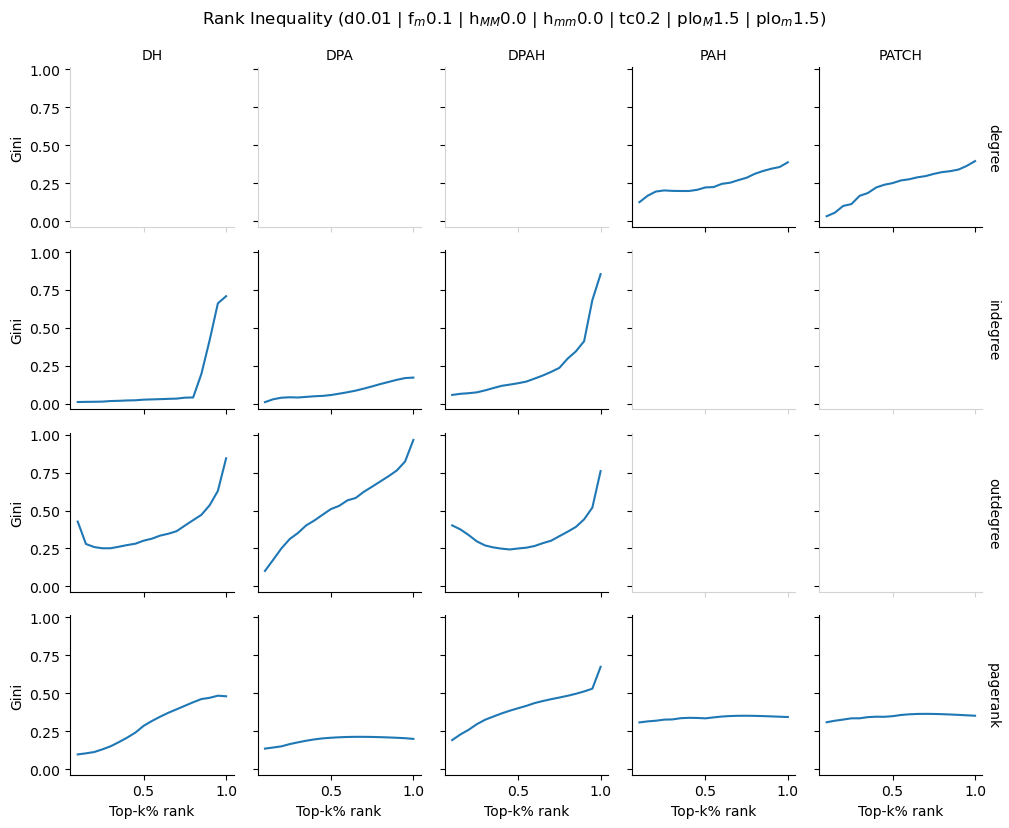

In [9]:
viz.plot_inequality_across_models(data, output=PLOTS, **params)